# Proyek Analisis Data: Nama dataset
- Nama: Bayu Indra Kusuma
- Email: bayuindrakusuma05@gmail.com
- Id Dicoding: https://www.dicoding.com/users/bayuik

## Menentukan Pertanyaan Bisnis

- Bagaimana pola pembelian terbanyak antara wilayah geografis?
- Bagaimana hubungan antara berat produk dan biaya pengiriman mempengaruhi nilai kepuasan pelanggan ?

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_dataset = pd.read_csv('datasets/customers_dataset.csv')
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
orders_dataset = pd.read_csv('datasets/orders_dataset.csv')
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
order_items_dataset = pd.read_csv('datasets/order_items_dataset.csv')
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:

order_reviews_dataset = pd.read_csv('datasets/order_reviews_dataset.csv')
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
products_dataset = pd.read_csv('datasets/products_dataset.csv')
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

In [7]:
customers_dataset.info()
print(f"duplicated: {customers_dataset.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
duplicated: 0


In [8]:
orders_dataset.info()
print(f"duplicated: {orders_dataset.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
duplicated: 0


In [9]:
order_items_dataset.info()
print(f"duplicated: {order_items_dataset.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
duplicated: 0


In [10]:
order_reviews_dataset.info()
print(f"duplicated: {order_reviews_dataset.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
duplicated: 0


In [11]:
products_dataset.info()
print(f"duplicated: {products_dataset.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
duplicated: 0


### Cleaning Data

In [12]:
customers_dataset.drop(
    ['customer_unique_id', 'customer_zip_code_prefix', 'customer_state'], axis=1, inplace=True)
customers_dataset.head()

,customer_id,customer_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas


In [13]:
orders_dataset.drop(['order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                    'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1, inplace=True)
orders_dataset

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c
...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1


In [14]:
order_items_dataset.drop(
    ['order_item_id', 'seller_id', 'shipping_limit_date'], axis=1, inplace=True)
order_items_dataset.head()

,order_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14


In [15]:
order_reviews_dataset.drop(['review_comment_title', 'review_creation_date',
                           'review_answer_timestamp', 'review_comment_message'], axis=1, inplace=True)
order_reviews_dataset.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [16]:
products_dataset.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                      'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1, inplace=True)
products_dataset.head()

,product_id,product_category_name,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0


## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
df = pd.merge(customers_dataset, orders_dataset, on='customer_id')
df = pd.merge(df, order_items_dataset, on='order_id')
df = pd.merge(df, order_reviews_dataset, on='order_id')
df = pd.merge(df, products_dataset, on='product_id')
df

,customer_id,customer_city,order_id,product_id,price,freight_value,review_id,review_score,product_category_name,product_weight_g
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,moveis_escritorio,8683.0
1,8912fc0c3bbf1e2fbf35819e21706718,santarem,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,moveis_escritorio,8683.0
2,8912fc0c3bbf1e2fbf35819e21706718,santarem,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,moveis_escritorio,8683.0
3,f0ac8e5a239118859b1734e1087cbb1f,nova santa rita,b1a5d5365d330d10485e0203d54ab9e8,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,251191809e37c1cffc16865947c18a4d,3,moveis_escritorio,8683.0
4,6bc8d08963a135220ed6c6d098831f84,mage,2e604b3614664aa66867856dba7e61b7,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,f7123bac5b91a0e2e38d8b41fd1206f4,4,moveis_escritorio,8683.0
...,...,...,...,...,...,...,...,...,...,...
112367,f6c6d3e1e20969a5eed982163f959719,sao paulo,b2f58affcc178fea2daaf834f1acff5e,9682ad2500ae8b2609e6a88eb0cbc5bb,99.90,21.14,17e0e42ddf0dd7ebceff457b7c1da303,3,casa_conforto,1500.0
112368,da37711b17efd5f2539e8196ab215f04,sao paulo,c8203bb57639618630affac9e8e923dd,aea06073397f809424f946979354c9f0,19.99,10.96,f3642bae4843d919c4c53ec1ff8fe26d,4,pet_shop,300.0
112369,184e0c2cfc746789643521df0e9ff904,sao miguel do guama,45b3000bcd10464ac178f32cd783fc83,bbf975bffd2ae9ee52f513ae5c8a4b27,250.00,54.11,6dfe34036fd1f79225daeaca9cf083c2,4,beleza_saude,2400.0
112370,821a7275a08f32975caceff2e08ea262,sao paulo,49645a8902c1ba980836b7bff991d69f,f6e0a9ce8a6e91c3a0ca2d3005911d20,84.90,7.46,260447daa5d738ced8f4e0bbee8a08a2,5,fashion_bolsas_e_acessorios,300.0


In [18]:
df.describe(include='all')

,customer_id,customer_city,order_id,product_id,price,freight_value,review_id,review_score,product_category_name,product_weight_g
count,112372,112372,112372,112372,112372.000000,112372.000000,112372,112372.000000,110774,112354.000000
unique,97917,4108,97917,32789,NaN,NaN,97709,NaN,73,NaN
top,be1c4e52bb71e0c54b11a26b8e8d59f2,sao paulo,5a3b1c29a49756e75f1ef513383c0c12,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN,e8236fe7b6e1bdd513a500de361e2b87,NaN,cama_mesa_banho,NaN
freq,22,17794,22,524,NaN,NaN,21,NaN,11137,NaN
mean,NaN,NaN,NaN,NaN,120.378962,19.977752,NaN,4.032473,NaN,2090.610882
std,NaN,NaN,NaN,NaN,182.152386,15.781421,NaN,1.387849,NaN,3748.608093
min,NaN,NaN,NaN,NaN,0.850000,0.000000,NaN,1.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,39.900000,13.070000,NaN,4.000000,NaN,300.000000
50%,NaN,NaN,NaN,NaN,74.900000,16.250000,NaN,5.000000,NaN,700.000000
75%,NaN,NaN,NaN,NaN,134.900000,21.150000,NaN,5.000000,NaN,1800.000000


In [19]:
df.groupby(by='review_score').agg({
    'customer_id': 'nunique',
    'product_weight_g': ["max", "min", "mean", "std"]
})

customer_id product_weight_g                                
                 nunique              max   min         mean          std
review_score                                                             
1                  10854          40425.0  50.0  2309.738987  4180.766044
2                   3086          30000.0  50.0  2286.535244  3985.155977
3                   8107          30000.0   0.0  2193.618062  3906.888707
4                  19065          30000.0   2.0  2124.589472  3722.454361
5                  57006          40425.0   0.0  2002.869834  3610.617643

In [20]:
df.groupby(by='review_score').agg({
    'customer_id': 'nunique',
    'freight_value': ["max", "min", "mean", "std"]
}).reset_index()

review_score customer_id freight_value                           
                   nunique           max  min       mean        std
0            1       10854        294.76  0.0  21.214145  17.919190
1            2        3086        321.88  0.0  20.943973  17.329938
2            3        8107        255.92  0.0  20.285945  15.089001
3            4       19065        375.28  0.0  20.053005  15.133306
4            5       57006        409.68  0.0  19.570804  15.463239

In [21]:
df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15291
rio de janeiro     6749
belo horizonte     2731
brasilia           2106
curitiba           1501
                  ...  
rio doce              1
iaras                 1
ibarama               1
ibema                 1
lagoao                1
Name: order_id, Length: 4108, dtype: int64

In [22]:
df.groupby(by=['product_category_name']).agg({
    'product_id': 'nunique',
    'review_score': 'mean'
}).reset_index()

,product_category_name,product_id,review_score
0,agro_industria_e_comercio,74,4.000000
1,alimentos,82,4.218182
2,alimentos_bebidas,103,4.315412
3,artes,54,3.937198
4,artes_e_artesanato,19,4.125000
...,...,...,...
68,sinalizacao_e_seguranca,92,4.086294
69,tablets_impressao_imagem,8,4.123457
70,telefonia,1125,3.946867
71,telefonia_fixa,115,3.683206


## Visualization & Explanatory Analysis

### Pertanyaan 1:

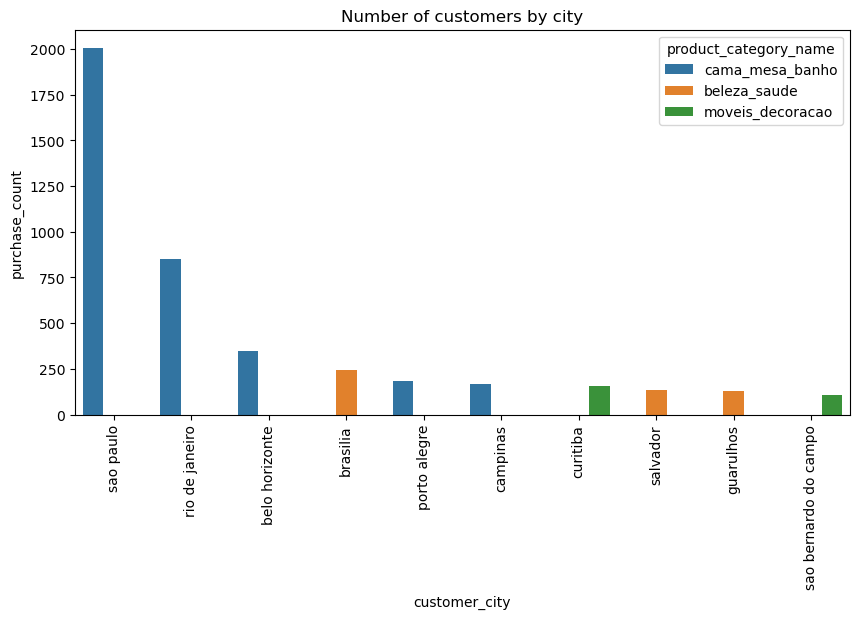

In [28]:
by_city = df.groupby(['customer_city', 'product_category_name']).size().reset_index(name='purchase_count')
top_category_per_city = by_city.sort_values(by=['customer_city', 'purchase_count'], ascending=[
                                            True, False]).groupby('customer_city').first().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(
    x='customer_city',
    y='purchase_count',
    hue='product_category_name',
    data=top_category_per_city.nlargest(10, 'purchase_count'))
plt.title('Number of customers by city')
plt.xticks(rotation=90)
plt.show()

### Pertanyaan 2:

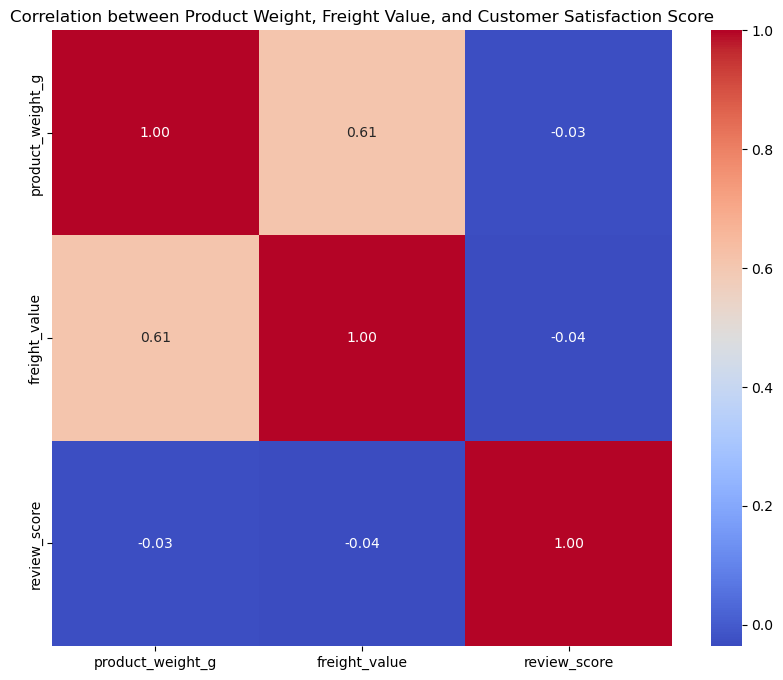

In [24]:
correlation_matrix = df[['product_weight_g', 'freight_value', 'review_score']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Product Weight, Freight Value, and Customer Satisfaction Score')
plt.show()

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2